### Semana 06 - lec02 - flow cytomery

  - FlowRepository
    - https://flowrepository.org/
  - Reading Flow cytometry:
    - https://taborlab.github.io/FlowCal/python_tutorial/read.html


### Distribuição normal centrada em 2.5 com SSD = .5

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

In [2]:
# os.system("pip install FlowCal")
import FlowCal

In [3]:
data = FlowCal.io.FCSData('../data/PBMC_NTC Stim 5hr no Blocker_004.fcs')
data.shape

(13305, 12)

In [5]:
data.channels, len(data.channels)

(('Time',
  'FSC-A',
  'FSC-H',
  'FSC-W',
  'SSC-A',
  'SSC-H',
  'SSC-W',
  'APC-A',
  'FITC-A',
  'HV 450-A',
  'PE-A',
  'PE-CF594-YG-A'),
 12)

In [6]:
data[0,:]

FCSData([6.9999999e-01, 1.4498331e+05, 8.1411578e+04, 1.1671100e+05,
         1.7665258e+05, 7.5649055e+04, 1.5303700e+05, 9.1559998e+01,
         2.1483000e+02, 1.5648000e+02, 2.2720000e+02, 1.2080000e+02],
        dtype=float32)

In [7]:
fcs = data[:, 1]
fcs[:20]

FCSData([144983.31 , 113651.43 , 137519.52 , 109888.71 , 101237.67 ,
          86598.17 , 101736.16 ,  69103.13 ,  85224.67 , 222037.33 ,
          77934.4  , 151982.14 , 102950.86 , 162891.75 ,  79742.06 ,
         147677.39 ,  67935.32 , 111576.445,  92703.88 ,  57322.52 ],
        dtype=float32)

In [8]:
ssc = data[:, 4]
ssc[:20]

FCSData([176652.58 ,  44039.22 , 152549.77 , 164066.88 ,  86885.25 ,
          19261.23 ,  32343.541,  48482.76 ,  40984.17 ,  52784.94 ,
          32252.4  ,  88179.81 ,  42921.36 ,  69361.26 ,  52964.43 ,
         108991.35 ,  26738.43 ,  35693.4  ,  34099.38 ,  35773.38 ],
        dtype=float32)

In [9]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
template='plotly_white'

import matplotlib as mpl
import pylab as plt
%matplotlib inline

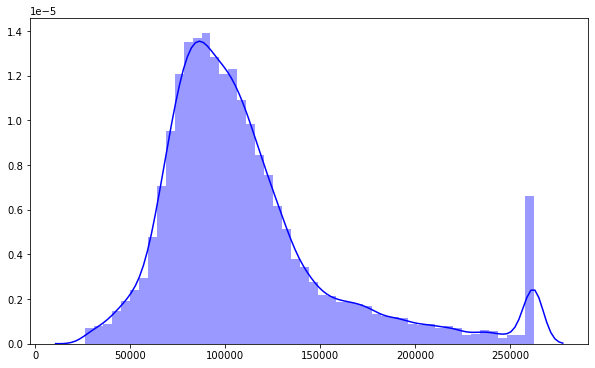

In [12]:
# ret = plt.hist(fcs, bins=100)
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(fcs, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.4))

### Normality Hypothesis Test

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

Jason Brownlee on August 15, 2018 in Statistics

In [14]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

xrandom = stats.norm.rvs(loc=1, scale=2, size=1200)
xrandom = np.random.normal(1, 2, 1200)

stat, p = shapiro(xrandom)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
mu  = np.mean(xrandom)
med = np.median(xrandom)
ssd = np.std(xrandom)
vc  = ssd/mu

'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(xrandom), vc)

stat=0.998, p=0.265
Probably Gaussian


'Mean = 1.07 median  = 1.07 SSD = 1.99, n = 1200, and VC = 1.87'

### FCS statistics

In [16]:
stat, p = shapiro(fcs)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
mu  = np.mean(fcs)
med = np.median(fcs)
ssd = np.std(fcs)
vc  = ssd/mu

'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcs), vc)

stat=0.862, p=0.000
Probably not Gaussian


'Mean = 110698.71 median  = 99810.57 SSD = 46538.12, n = 13305, and VC = 0.42'

### Matplotlib

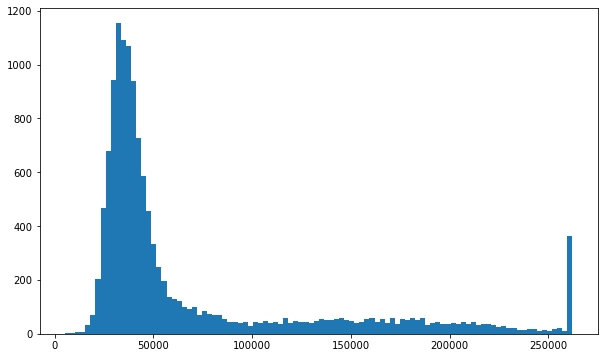

In [17]:
fig = plt.figure(figsize=(10,6))
ret = plt.hist(ssc, bins=100)

### Seaborn

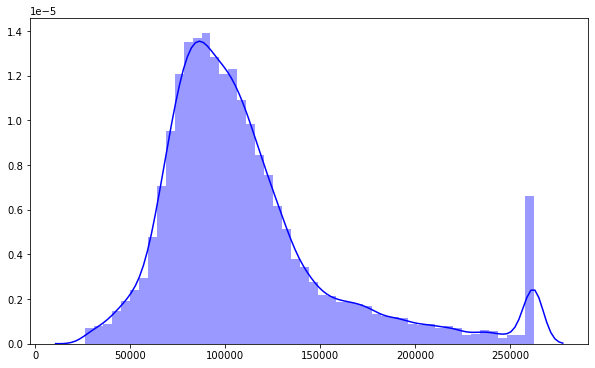

In [18]:
fig = plt.figure(figsize=(10,6))
sns.distplot(fcs, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.4));

### Plotly

In [22]:
stat, p = shapiro(fcs)

title = 'FCS >>type plot<br>stat=%.3f, p=%.3f'%(stat, p)
if p > 0.05:
    title += ' - Probably Gaussian'
else:
    title += ' - Probably not Gaussian'
    
mu  = np.mean(fcs)
med = np.median(fcs)
ssd = np.std(fcs)
vc  = ssd/mu

title += '<br>Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcs), vc)
in_percent = False

fig = go.Figure()

if in_percent:
    title = title.replace(">>type", "distribution")
    fig.add_trace(go.Histogram(x=fcs, histnorm='probability', marker_color='blue', opacity=0.4))
    yaxis_title="probaility (%)"
else:
    title = title.replace(">>type", "fequency")
    fig.add_trace(go.Histogram(x=fcs, marker_color='blue', opacity=0.4))
    yaxis_title="frequency"
        # text=textList_one,
        # hovertemplate = "pos: %{x}<br>count: %{y}</br>%{text}",
        # name=name, marker_line_width=1,

fig.update_layout(
    # barmode = 'group',
    autosize=True,
    title=title,
    # width=width,
    # height=height,
    # template=template,
    margin=dict( l=40, r=40, b=40, t=100, pad=4),
    font=dict(
        family="Arial, bold, monospace",
        size=14,
        color='black'
    ),
    xaxis_title="FCS",
    yaxis_title=yaxis_title,
    paper_bgcolor="whitesmoke",
    plot_bgcolor= "whitesmoke", # lightgrey ivory gainsboro whitesmoke lightsteelblue 'lightcyan' 'azure', white, lightgrey, snow ivory beige powderblue
    showlegend=False
)
fig.show()

### Lognormal

In [23]:
fcsLog = [np.log2(x) for x in fcs]
sscLog = [np.log2(x) for x in ssc]

In [24]:
stat, p = shapiro(fcsLog)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
mu  = np.mean(fcsLog)
med = np.median(fcsLog)
ssd = np.std(fcsLog)
vc  = ssd/mu

'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcsLog), vc)

stat=0.977, p=0.000
Probably not Gaussian


'Mean = 16.65 median  = 16.61 SSD = 0.55, n = 13305, and VC = 0.03'

In [25]:
stat, p = shapiro(sscLog)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
mu  = np.mean(sscLog)
med = np.median(sscLog)
ssd = np.std(sscLog)
vc  = ssd/mu

'Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(sscLog), vc)

stat=0.867, p=0.000
Probably not Gaussian


'Mean = 15.70 median  = 15.33 SSD = 0.99, n = 13305, and VC = 0.06'

### Seaborn

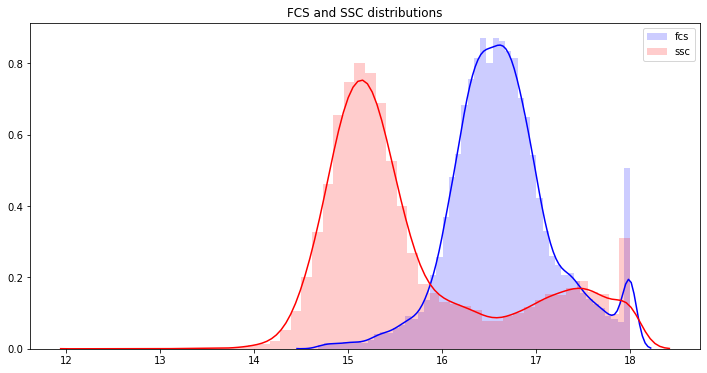

In [26]:
fig = plt.figure(figsize=(12,6))
ax = sns.distplot(fcsLog, hist=True, kde=True, color='blue', hist_kws=dict(alpha=.2), label='fcs')
ax = sns.distplot(sscLog, hist=True, kde=True, color='red',  hist_kws=dict(alpha=.2), label='ssc')

plt.title("FCS and SSC distributions")
plt.legend();

### Plotly

In [27]:
stat, p = shapiro(fcsLog)

title = 'FCS >>type plot<br>stat=%.3f, p=%.3f'%(stat, p)
if p > 0.05:
    title += ' - Probably Gaussian'
else:
    title += ' - Probably not Gaussian'
    
mu  = np.mean(fcsLog)
med = np.median(fcsLog)
ssd = np.std(fcsLog)
vc  = ssd/mu

title += '<br>Mean = %.2f median  = %.2f SSD = %.2f, n = %d, and VC = %.2f'%(mu, med, ssd, len(fcsLog), vc)
in_percent = True

fig = go.Figure()

if in_percent:
    title = title.replace(">>type", "lognormal distribution")
    fig.add_trace(go.Histogram(x=fcs, histnorm='probability', marker_color='blue', opacity=0.4))
    yaxis_title="percent (%)"
else:
    title = title.replace(">>type", "lognormal fequency")
    fig.add_trace(go.Histogram(x=fcs, histnorm='probability', marker_color='blue', opacity=0.4))
    yaxis_title="frequency"
        # text=textList_one,
        # hovertemplate = "pos: %{x}<br>count: %{y}</br>%{text}",
        # name=name, marker_line_width=1,

fig.update_layout(
    # barmode = 'group',
    autosize=True,
    title=title,
    # width=width,
    # height=height,
    # template=template,
    margin=dict( l=40, r=40, b=40, t=100, pad=4),
    font=dict(
        family="Arial, bold, monospace",
        size=14,
        color='black'
    ),
    xaxis_title="FCS",
    yaxis_title=yaxis_title,
    paper_bgcolor="whitesmoke",
    plot_bgcolor= "whitesmoke", # lightgrey ivory gainsboro whitesmoke lightsteelblue 'lightcyan' 'azure', white, lightgrey, snow ivory beige powderblue
    showlegend=False
)
fig.show()

/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/envs/py_env37/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



In [28]:
title = 'cytometry example'
fontsize=14; fontcolor='black';
width=2000; height=600;

fig = go.Figure()

fig.add_trace(go.Scatter(x=fcsLog, y=sscLog, 
                 # text=textList_one,
                 # hovertemplate = "pos: %{x}<br>count: %{y}</br>%{text}",
                 mode='markers', marker_color='blue') ) # name=name, marker_line_width=1,


fig.update_layout(
    # barmode = 'group',
    autosize=True,
    title=title,
    # width=width,
    # height=height,
    # template=template,
    margin=dict( l=40, r=40, b=40, t=100, pad=4),
    font=dict(
        family="Arial, bold, monospace",
        size=fontsize,
        color=fontcolor
    ),
    xaxis_title="FSC - forward scatter",
    yaxis_title="SSC = side scatter",
    paper_bgcolor="whitesmoke",
    plot_bgcolor= "whitesmoke", # lightgrey ivory gainsboro whitesmoke lightsteelblue 'lightcyan' 'azure', white, lightgrey, snow ivory beige powderblue
    showlegend=False
)
fig.show()

In [34]:
df = pd.DataFrame([fcsLog, sscLog]).T
df.columns = ['fscLog', 'sscLog']
df

,fscLog,sscLog
0,17.145527,17.430555
1,16.794256,15.426501
2,17.069277,17.218920
3,16.745684,17.323925
4,16.627386,16.406824
...,...,...
13300,16.914078,17.127676
13301,16.148638,15.071164
13302,17.999994,17.022511
13303,17.275513,17.703337


### Seaborn

see: http://seaborn.pydata.org/generated/seaborn.jointplot.html

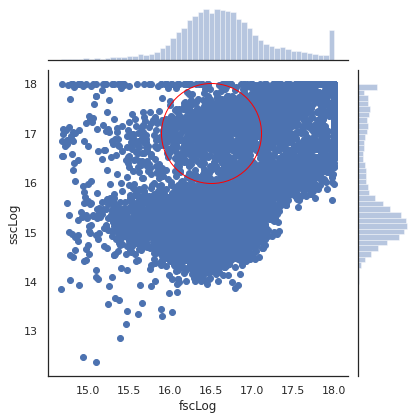

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", color_codes=True)

ax = sns.jointplot(x="fscLog", y="sscLog", data=df);

#-- draw a circle
ax.ax_joint.plot([16.5],[17],'o',ms=100,mec='red',mfc='none')